# TP : projections climatiques
## Estimation des incertitudes climatiques dans le cas des projections de la température globale

Saïd Qasmi (said.qasmi@meteo.fr)

Votre notebook, renommé suivant le format `notebook_VOTRE_NOM_DE_FAMILLE.ipynb` est à renvoyer par mail, **sans objet et sans contenu texte**.

### Rappels du cours sur les projections futures et incertitudes (cf. cours de Julien Cattiaux n°09/10 donné en deuxième année)

**Rappel de terminologie :**

- Climat = état moyen + variabilité climatique
- Variabilité climatique = variabilité interne + forçages externes
- Forçages externes = forçages naturels + forçages anthropiques
- Variabilité interne + forçages naturels = variabilité naturelle

La précision des projections climatiques fournies par les modèles de climat dépend de **l'incertitude climatique** qui est fonction de trois facteurs :
1. le scénario d'émissions des gaz à effet de serre (GES) et des aérosols anthropiques, c'est-à-dire des *forçaces externes* d'origine anthropique, dont la concentration va être modifié au cours des prochaines décennies : **<span style="color: green;">l'incertitude scénario</span>**
2. **<span style="color: orange;">la variabilité interne</span>** du système climatique
3. l'erreur de modélisation de la variabilité climatique : **<span style="color: blue;">l'incertitude modèle</span>**

L'incertitude scénario due aux forçages anthropiques qui modifient l'équilibre radiatif du système climatique est modulée par le choix d'une trajectoire socio-économique plus ou moins émettrice de GES.

L'incertitude due à la variabilité interne englobe les fluctuations climatiques qui se produisent naturellement en l'absence de toute modification des forçages radiatifs.

L'incertitude du modèle quantifie l'erreur de modélisation dans la simulation des réponses climatiques aux forçages naturels (activité solaire, aérosols naturels etc.) et anthropiques.

#### L'amplitude des incertitudes dépend de l'échelle spatio-temporelle

Pour un scénario d'émissions donné, nous savons qu'à l'échelle locale, l'incertitude liée à la variabilité interne est généralement plus grande que l'incertitude modèle à une échéance décennale. A mesure que l'échelle spatio-temporelle s'agrandit, la variabilité interne locale est moyennée et est réduite laissant apparaître la réponse du système aux forçages externes anthropiques.

Ainsi, plus l'échelle spatio-temporelle devient grande, plus l'incertitude due à la variabilité interne diminue et plus l'incertitude modèle augmente, si bien que dans le cas des projections de la température globale, la seconde devient prédominante devant la première :

![alt text](data/frac_var.png "Title")

### Objectifs du TP :
Estimer les incertitudes associées aux projections de températures à l’échelle globale, en estimant les contributions :
- de la variabilité interne
- de la trajectoire socio-économique future (scénario)
- des biais des modèles

### Données à disposition :
Valeurs annuelles de la température moyenne globale à 2 m de 1950 à 2099 pour 16 modèles de climat, et
3 scénarios socio-économiques (Shared Socio-Economic Pathway): SSP1-2.6, SSP2-4.5, SSP5-8.5.
Toutes les données correspondantes sont préparées dans les fichiers sous le format ``T_ssp*.asc``.

### Chargement/installation des librairies python

La cellule suivante contient les librairies à charger, elle n'est pas à modifier.

***Si l'execution de la cellule ne fonctionne pas:***
- Installer les packages manquant en tapant dans un terminal, sans être connecté au VPN Météo-France :

`pip install --user le_package_en_question`

- Redémarrer le noyau dans le menu ci-dessus.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Chargement des variables, et prise en main de xarray

Dans un premier temps, il s'agit de charger les champs de température pour les 3 scénarios considérés :

In [2]:
# Set the path where data are located
path_data = "./data/"

# tas, psl and pr stand for the variable names within each netcdf file
T_ssp26 = pd.read_csv(path_data+"T_ssp26.asc", sep=" ")-273.15
T_ssp45 = pd.read_csv(path_data+"T_ssp45.asc", sep=" ")-273.15
T_ssp85 = pd.read_csv(path_data+"T_ssp85.asc", sep=" ")-273.15

Puis on vérifie que les variables chargés ont bien les bonnes coordonnées et dimensions.

In [3]:
# Verify fields dimensions
T_ssp85

CNRM-CM6-1  CNRM-ESM2-1  BCC-CSM2-MR  CESM2-WACCM      CESM2  \
1950   13.064050    13.609186    14.973566    14.098047  14.097894   
1951   12.975641    13.526636    15.146661    14.226099  14.197900   
1952   12.963190    13.478479    14.968134    14.323907  14.296106   
1953   12.822473    13.623376    15.002283    14.152948  14.294855   
1954   12.856317    13.625482    15.041193    14.087396  14.060541   
...          ...          ...          ...          ...        ...   
2095   18.942865    18.862634    18.872949    19.902521  20.005151   
2096   18.984705    19.083826    18.967798    20.089258  20.216852   
2097   19.182031    18.987238    18.958276    19.985803  20.170801   
2098   19.229211    19.025873    18.998743    20.016199  20.276086   
2099   19.341119    19.238092    19.105493    20.081506  20.311823   

      UKESM1-0-LL  GFDL-ESM4    CanESM5  CAMS-CSM1-0  EC-Earth3  \
1950    13.167841  13.591394  14.013635    13.903619  14.620172   
1951    13.179529  13.495264  13.919031    14.150018  14.572137   
1952    13.259363  13.516992  13.902246    14.027063  14.529230   
1953    13.299738  13.633661  13.713617    14.201288  14.313684   
1954    13.585260  13.630823  13.713678    14.328790  14.506982   
...           ...        ...        ...          ...        ...   
2095    20.413629  17.362482  20.926691    17.149713  19.374719   
2096    20.490991  17.401086  21.132715    17.184351  19.745660   
2097    20.489221  17.187311  21.037897    17.280267  19.991266   
2098    20.654382  17.485925  21.034998    17.480981  19.789240   
2099    20.485223  17.681024  21.296930    17.048303  19.765833   

      EC-Earth3-Veg  MRI-ESM2-0      NESM3  MIROC-ES2L     MIROC6  \
1950      14.195825   14.117059  14.282098   15.403436  15.448114   
1951      13.996118   14.041315  14.365472   15.086420  15.407739   
1952      14.170099   13.909631  14.288599   15.086969  15.381799   
1953      14.085199   13.812006  14.427515   15.299402  15.287897   
1954      14.051111   13.928278  14.289728   15.135156  15.330408   
...             ...         ...        ...         ...        ...   
2095      19.803583   18.208704  19.103326   19.337030  19.294092   
2096      19.599542   18.402429  19.235254   19.608911  19.208856   
2097      19.799432   18.621210  19.139703   19.480432  19.331445   
2098      19.961664   18.312494  19.300439   19.315607  19.718469   
2099      20.076746   18.418146  19.503015   19.398920  19.522363   

      IPSL-CM6A-LR  
1950     13.078424  
1951     13.235010  
1952     13.381433  
1953     13.262384  
1954     13.145105  
...            ...  
2095     19.257074  
2096     19.369867  
2097     19.255853  
2098     19.491968  
2099     19.731226  

[150 rows x 16 columns]

In [4]:
# Get dimension numbers and names
years = T_ssp85.index.values
models = T_ssp85.columns.values
nyr = len(years)
nmod = len(models)

On peut maintenant commencer à estimer l'incertitude dans notre ensemble !

### Séparation de la variabilité interne et de la réponse aux forçages externes :

La variabilité de la température globale est supposée décomposable comme combinaison linéaire d’une variabilité forcée par les forçages externes (gaz à effet de serre, aérosols, cycle solaire) et d’une variabilité naturelle, intrinsèque au système climatique (variabilité interne).

Les projections de température $X$ pour chaque modèle $m$, scénario $s$ et échéance $t$ peuvent alors s’écrire de la manière suivante :

$$ X(t, m, s) = x(t, m, s) + \epsilon(t, m, s) $$

- La réponse aux forçages externes est notée $x$. Elle correspond à un lissage de $X$ sur l’ensemble de la période projetée, de telle sorte à filtrer la variabilité interne interannuelle au premier ordre.
- Le résidu est noté $\epsilon$ et correspond à la variabilité interne.

Voyons d'abord à quoi ressemble la série temporelle brute de température pour le modèle CNRM-CM6-1 pour les trois scénarios envisagés.

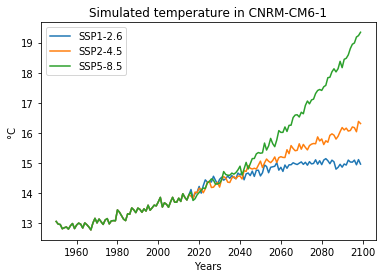

In [5]:
# Plot
plt.plot(T_ssp26["CNRM-CM6-1"], label='SSP1-2.6')
plt.plot(T_ssp45["CNRM-CM6-1"], label='SSP2-4.5')
plt.plot(T_ssp85["CNRM-CM6-1"], label='SSP5-8.5')
plt.title("Simulated temperature in CNRM-CM6-1")
plt.xlabel('Years') 
plt.ylabel('°C')
plt.legend()


Pour chacune de ces trois séries de $X$, la variabilité interne $\epsilon$ se superpose à une réponse de la température aux forçages externes anthropiques $x$, qui se matérialise par une tendance croissante.

#### Estimation de la réponse aux forçages externes

L'étape suivante consiste à isoler $x$ de $\epsilon$. Pour cela, nous estimons $x$ en approximant $X$ par un polynôme d'ordre 2 (une tendance quadratique) pour lisser la série temporelle.

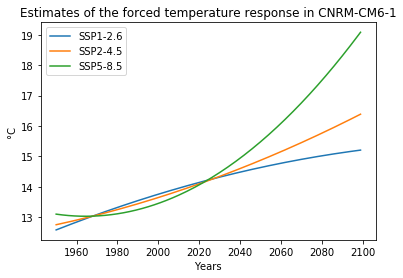

In [6]:
# Fit quadratic parameters on raw time series
deg = 2
coef_T_ssp26 = np.polyfit(years,T_ssp26,2)
coef_T_ssp45 = np.polyfit(years,T_ssp45,2)
coef_T_ssp85 = np.polyfit(years,T_ssp85,2)

# initialize the forced response
ant_T_ssp26 = T_ssp26.copy()
ant_T_ssp45 = T_ssp45.copy()
ant_T_ssp85 = T_ssp85.copy()

# compute the time series for each model
for imod in range(nmod):
    ant_T_ssp26[models[imod]] = np.polyval(coef_T_ssp26[:,imod], years)
    ant_T_ssp45[models[imod]] = np.polyval(coef_T_ssp45[:,imod], years)
    ant_T_ssp85[models[imod]] = np.polyval(coef_T_ssp85[:,imod], years)

# Plot for CNRM-CM6
plt.plot(ant_T_ssp26["CNRM-CM6-1"], label='SSP1-2.6')
plt.plot(ant_T_ssp45["CNRM-CM6-1"], label='SSP2-4.5')
plt.plot(ant_T_ssp85["CNRM-CM6-1"], label='SSP5-8.5')
plt.title("Estimates of the forced temperature response in CNRM-CM6-1")
plt.xlabel('Years') 
plt.ylabel('°C')
plt.legend()


### Question

Ce lissage de $X$ n'est pas parfait, pourquoi ?

Votre réponse ici

#### Estimation de la variabilité interne

Maintenant que l'on a isolé la réponse $x$, la variabilité interne $\epsilon$ se déduit facilement comme la différence entre $X$ et $x$:

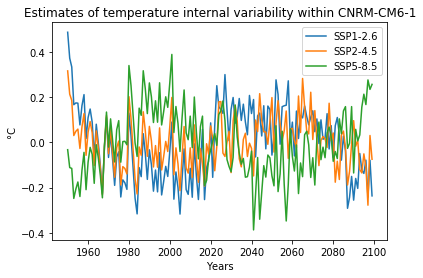

In [7]:
# get internal variability
iv_T_ssp26 = T_ssp26 - ant_T_ssp26
iv_T_ssp45 = T_ssp45 - ant_T_ssp45
iv_T_ssp85 = T_ssp85 - ant_T_ssp85

# plot for CNRM-CM6
plt.plot(iv_T_ssp26["CNRM-CM6-1"], label='SSP1-2.6')
plt.plot(iv_T_ssp45["CNRM-CM6-1"], label='SSP2-4.5')
plt.plot(iv_T_ssp85["CNRM-CM6-1"], label='SSP5-8.5')
plt.title("Estimates of temperature internal variability within CNRM-CM6-1")
plt.xlabel('Years') 
plt.ylabel('°C')
plt.legend()


### Questions

- Comment expliquez-vous la présence de cycles décennaux pour ces différentes estimations de la variabilité interne ?
- Ces 150 années sont-elles suffisants pour estimer correctement la variabilité interne, et pourquoi ?
- Quelle alternative proposez-vous pour obtenir une meilleure estimation de la variabilité interne ?

Votre réponse ici

### Estimation de l'incertitude climatique

Nous reprenons la décomposition en sources d'incertitudes formulée au début du TP.

L’incertitude $\color{orange}{V}$ due à la variabilité interne est considérée ici comme constante (indépendante de $t$) et indépendante du scénario d'émission (indépendante de $s$). Elle est définie à partir de la moyenne à travers les modèles de la variance de $\epsilon$ :

$$\color{orange}{V = \frac{1}{N_{mod}} \sum_{m=1}^{N_{mod}} \textrm{Var}_{t,s}[\epsilon(m)]}$$

où $N_{mod}$ correspond au nombre de modèles, et l’opérateur $\textrm{Var}_{t,s}$ à la variance calculée à travers les scénarios et les échéances.

In [13]:
# Concatenate the three scenarios
iv_T = iv_T_ssp26.loc[1950:2000].append([iv_T_ssp45.loc[1950:2000],iv_T_ssp85.loc[1950:2000]])

# Compute the variance across the scenarios and the years
iv_unc_variance = iv_T.var()

# Get the multi-model mean
iv_unc = iv_unc_variance.mean()
iv_unc

0.04953691754939793

L’incertitude modèle $\color{blue}{M}$ repose sur la dispersion des réponses $x$ simulée par les différents modèles disponibles. Elle est donc définie pour chaque échéance $t$, comme la moyenne à travers les scénarios de la variance de $x$ à travers les modèles :

$$\color{blue}{M(t) = \frac{1}{N_{scen}} \sum_{s=1}^{N_{scen}} \textrm{Var}_{m}[x(t,s)]}$$

où $N_{scen}$ désigne le nombre de scénarios, et l’opérateur $\textrm{Var}_{m}$ à la variance calculée à travers les modèles.

In [14]:
# Model uncertainty for each scenario: variance across the models
mod_unc_T_ssp26 = ant_T_ssp26.var(axis=1)
mod_unc_T_ssp45 = ant_T_ssp45.var(axis=1)
mod_unc_T_ssp85 = ant_T_ssp85.var(axis=1)

# Mean across the scenarios
mod_unc = 1/3 * (mod_unc_T_ssp26+mod_unc_T_ssp45+mod_unc_T_ssp85)
mod_unc

1950    0.486115
1951    0.484063
1952    0.482026
1953    0.480004
1954    0.477994
          ...   
2095    0.595074
2096    0.606384
2097    0.618031
2098    0.630018
2099    0.642353
Length: 150, dtype: float64

L’incertitude scénario $\color{green}{S}$ est quant à elle définie comme la variance à travers les scénarios des moyennes à travers les modèles de $x$ :

$$\color{green}{S(t) = \textrm{Var}_{m}\left[\frac{1}{N_{mod}} \sum_{m=1}^{N_{mod}} x(t,m)\right]}$$

In [16]:
# Scenario uncertainty for each year: mean across the forced response
mod_avg_T_ssp26 = ant_T_ssp26.mean(axis=1)
mod_avg_T_ssp45 = ant_T_ssp45.mean(axis=1)
mod_avg_T_ssp85 = ant_T_ssp85.mean(axis=1)

# Concatenate the three scenarios
mod_avg_T = pd.concat([mod_avg_T_ssp26,mod_avg_T_ssp45,mod_avg_T_ssp85],axis=1,keys=['SSP26','SSP45','SSP85'])

# Variance across the scenarios
scen_unc = mod_avg_T.var(axis=1)
scen_unc

1950    0.038760
1951    0.033387
1952    0.028527
1953    0.024153
1954    0.020236
          ...   
2095    2.583223
2096    2.693471
2097    2.807134
2098    2.924280
2099    3.044978
Length: 150, dtype: float64

Les incertitudes sont supposées comme étant additives et n’interagissent pas entre-elles ; l'incertitude totale est alors définie comme la somme $T$ des incertitudes calculées précédemment :
$$ T(t) = \color{orange}{V} + \color{blue}{M(t)} + \color{green}{S(t)}$$

In [23]:
# Compute the total variance
total_unc = iv_unc + mod_unc + scen_unc

On peut ainsi vérifier que l'incertitude croît avec l'échéance.

Text(0,0.5,'Variance [°C²]')

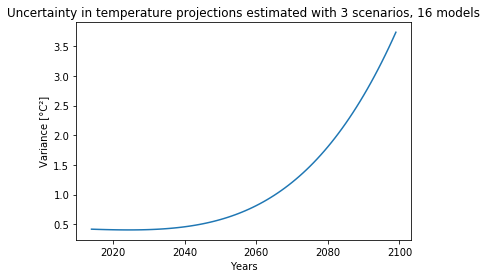

In [31]:
# plot over the projected period
plt.plot(total_unc.loc[2014:2099])
plt.title("Uncertainty in temperature projections estimated with 3 scenarios, 16 models")
plt.xlabel('Years') 
plt.ylabel('Variance [°C²]')

Pour y avoir plus clair et identifier l'importance de chaque source d'incertitude, on peut normaliser chacune d'entre-elles par l'incertitude totale, pour obtenir des pourcentages de contribution.

In [49]:
# Normalize each uncertainty by T
iv_unc_relative = iv_unc/total_unc*100
mod_unc_relative = mod_unc/total_unc*100
scen_unc_relative = scen_unc/total_unc*100

unc_relative = pd.concat([mod_unc_relative,scen_unc_relative,iv_unc_relative],axis=1,
                         keys=['model uncertainty','scenario uncertainty','internal variability'])

unc_relative


model uncertainty  scenario uncertainty  internal variability
1950          84.628270              6.747791              8.623939
1951          85.374551              5.888581              8.736868
1952          86.062180              5.093371              8.844449
1953          86.691278              4.362083              8.946639
1954          87.262323              3.694245              9.043432
...                 ...                   ...                   ...
2095          18.435699             80.029621              1.534680
2096          18.104307             80.416711              1.478982
2097          17.786582             80.787773              1.425645
2098          17.481888             81.143551              1.374561
2099          17.189620             81.484754              1.325627

[150 rows x 3 columns]

Visuellement, on peut finalement refaire la représentation graphique présentée au début du TP.

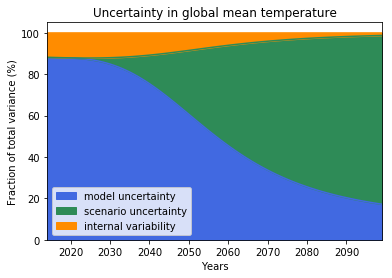

In [55]:
ax = unc_relative.loc[2014:2099].plot(kind='area', stacked=True, color=['royalblue','seagreen','darkorange'], title='Uncertainty in global mean temperature')

ax.set_ylabel('Fraction of total variance (%)')
ax.set_xlabel('Years')
plt.show()

### Question

Comment expliquez-vous les différences entre cette figure et le panel a) de la figure présentée au début du TP, notamment en début de période ?

Votre réponse ici